In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns

In [2]:
digits = load_digits()

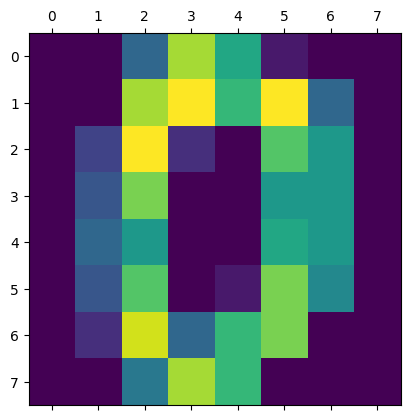

In [3]:
plt.matshow(digits.images[0])

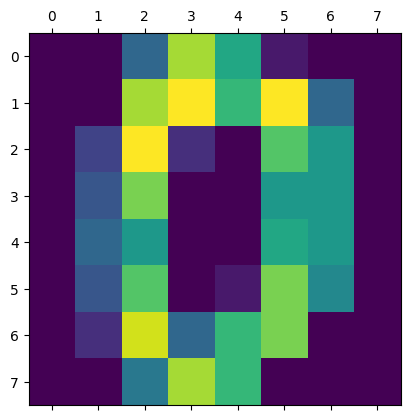

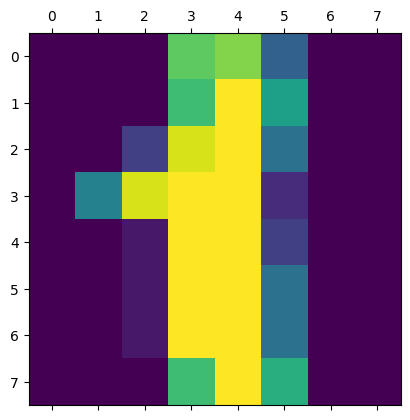

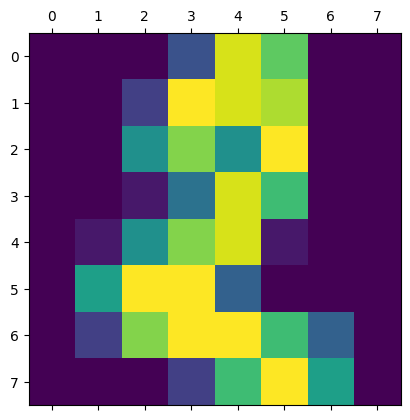

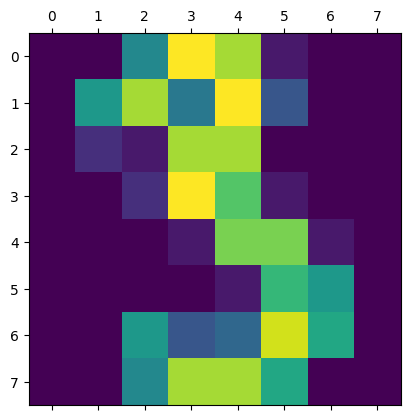

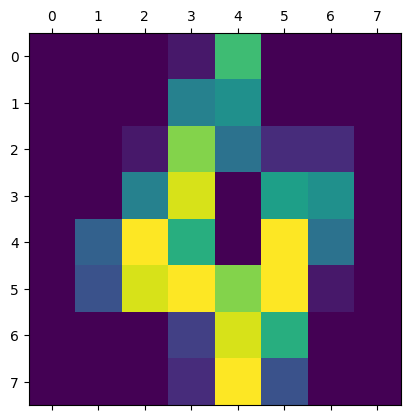

In [4]:
for i in range(5):
    plt.matshow(digits.images[i])

In [5]:
digits.target[i]

4

In [6]:
df = pd.DataFrame(digits.target)
df

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
X_train.shape

(1437, 64)

In [12]:
len(y_test)

360

In [13]:
#model selection using random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
classifier = RandomForestClassifier(n_estimators=100)

In [15]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
y_pred

array([0, 4, 4, 5, 4, 8, 1, 4, 2, 9, 0, 4, 9, 3, 6, 6, 5, 4, 4, 6, 2, 7,
       4, 4, 6, 4, 3, 5, 7, 6, 7, 3, 9, 0, 1, 7, 6, 5, 8, 7, 8, 9, 7, 8,
       3, 8, 7, 3, 9, 3, 1, 4, 0, 4, 1, 3, 7, 1, 7, 6, 1, 6, 9, 4, 4, 0,
       3, 0, 5, 7, 8, 9, 3, 3, 9, 8, 4, 1, 6, 0, 6, 7, 1, 3, 0, 1, 9, 1,
       2, 0, 2, 5, 1, 7, 4, 6, 9, 5, 4, 6, 9, 3, 7, 4, 6, 0, 1, 0, 4, 1,
       0, 0, 4, 7, 2, 4, 5, 8, 5, 6, 6, 3, 3, 3, 0, 0, 0, 8, 3, 0, 1, 7,
       0, 9, 3, 9, 4, 2, 9, 5, 1, 8, 1, 8, 7, 8, 0, 5, 0, 4, 6, 7, 8, 8,
       6, 3, 1, 6, 4, 9, 4, 8, 5, 2, 4, 4, 0, 7, 0, 6, 9, 1, 6, 0, 7, 6,
       4, 9, 0, 2, 4, 4, 5, 1, 1, 7, 5, 9, 4, 3, 2, 9, 9, 8, 0, 5, 3, 2,
       2, 3, 7, 9, 9, 2, 8, 7, 6, 4, 3, 9, 6, 3, 2, 1, 1, 8, 0, 9, 7, 7,
       9, 7, 1, 9, 2, 7, 8, 0, 2, 9, 6, 6, 8, 2, 5, 1, 4, 9, 3, 3, 4, 7,
       5, 3, 3, 1, 4, 2, 0, 1, 6, 0, 4, 7, 1, 3, 2, 9, 5, 5, 1, 9, 9, 0,
       3, 8, 4, 1, 4, 3, 9, 8, 5, 4, 7, 6, 1, 4, 9, 0, 4, 0, 8, 9, 0, 9,
       3, 5, 9, 3, 9, 3, 2, 6, 5, 5, 6, 6, 7, 2, 8,

In [18]:
#classification report 
from sklearn.metrics import classification_report,accuracy_score 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.97      1.00      0.99        37
           2       1.00      0.96      0.98        25
           3       1.00      0.97      0.99        39
           4       0.98      0.98      0.98        45
           5       1.00      0.94      0.97        32
           6       0.97      0.97      0.97        35
           7       1.00      1.00      1.00        35
           8       0.83      0.96      0.89        25
           9       1.00      0.95      0.98        42

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



In [19]:
print(accuracy_score(y_test,y_pred))

0.975


In [20]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

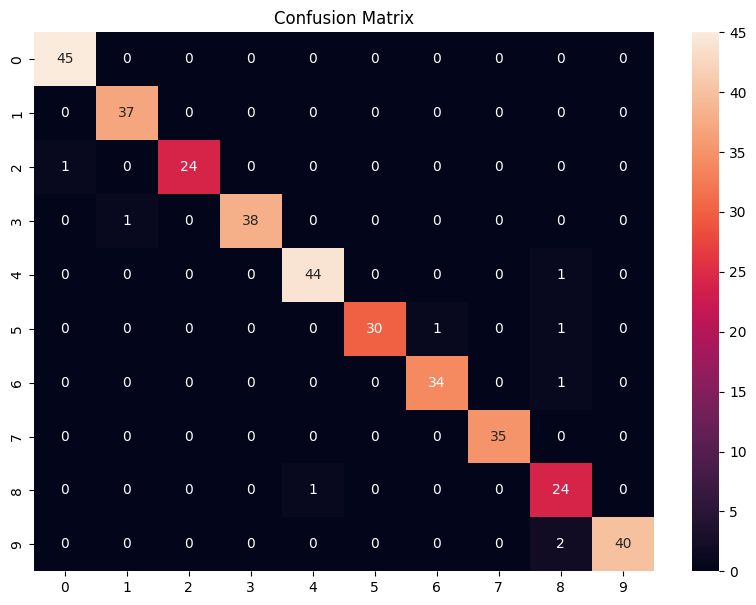

In [21]:
#show this using graph
plt.figure(figsize=(10,7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
sns.heatmap(cm,annot=True)
plt.show()

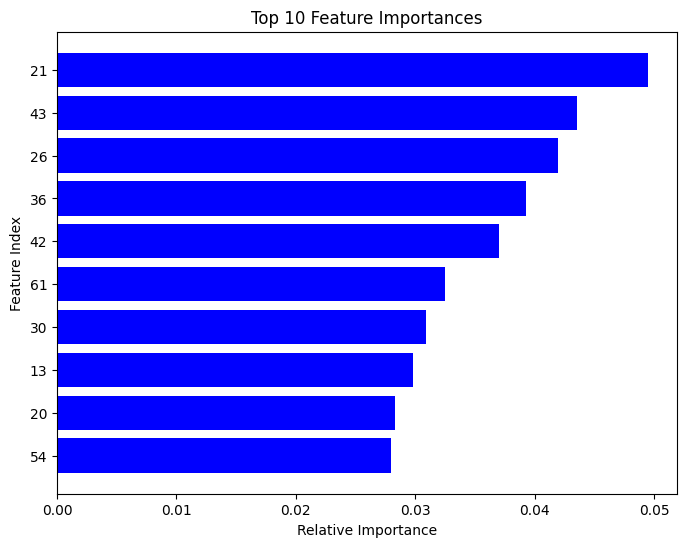

In [22]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 important features
plt.figure(figsize=(8,6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Index")
plt.yticks(range(len(indices)), indices)
plt.show()